# TP3: Detector de SPAM - Solución

![spam counter](./resources/spam.png)

## Introducción - Detectores de SPAM

Uno de los problemas más comunes en la clasificación es la detección de correos electrónicos SPAM. Uno de los primeros 
modelos utilizados para abordar este problema fue el clasificador de Bayes ingenuo. La detección de SPAM es un problema 
persistente en el mundo digital, ya que los spammers continúan adaptando sus estrategias para eludir los filtros de 
correo no deseado. Además del clasificador de Bayes ingenuo, se han desarrollado y utilizado una variedad de técnicas 
más avanzadas en la detección de SPAM, que incluyen algoritmos de aprendizaje automático, redes neuronales y métodos 
basados en reglas.

En este trabajo práctico, utilizaremos un conjunto de datos que consta de 4601 observaciones de correos electrónicos, 
de los cuales 2788 son correos legítimos y 1813 son correos SPAM. Dado que el contenido de los correos electrónicos es 
un tipo de dato no estructurado, es necesario procesarlo de alguna manera. Para este conjunto de datos, ya se ha 
aplicado un procesamiento típico en el Procesamiento del Lenguaje Natural (NLP), que consiste en contar la frecuencia 
de palabras observadas en los correos.

El procesamiento de lenguaje natural (NLP) desempeña un papel fundamental en la detección de SPAM, ya que permite 
analizar el contenido de los correos electrónicos y extraer características relevantes para la clasificación. Además 
de contar la frecuencia de palabras, se pueden utilizar técnicas más sofisticadas, como la extracción de 
características semánticas y el análisis de sentimientos, para mejorar la precisión de los modelos de detección de SPAM.


Con el fin de preservar la privacidad de los mensajes, la frecuencia de palabras se encuentra normalizada. El conjunto 
de datos está compuesto por 54 columnas de atributos que se denominan:

- `word_freq_XXXX`: Donde `XXXX` es la palabra o símbolo. Los valores son enteros que van de 0 a 20k.

Además, hay una columna adicional llamada `spam`, que es 1 si el correo es SPAM o 0 si no lo es.

## Tareas y preguntas a resolver:

In [45]:
# Importación de librerías.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.naive_bayes import MultinomialNB   
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, auc, roc_curve


In [46]:
# Leemos el dataset
df_spam = pd.read_csv("dataset/spambase.csv")

print('Datos obtenidos: ')
df_spam.sample(n=5)

Datos obtenidos: 


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,spam
435,600,0,360,0,1440,0,0,0,240,1320,...,0,0,0,0,40,0,101,222,0,1
1563,0,0,0,0,0,0,0,4000,0,0,...,0,0,0,0,0,0,0,0,0,1
4152,0,780,1560,0,0,0,0,0,0,0,...,0,0,0,0,137,0,275,0,0,0
3886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# Chequeamos los tipos de datos.
df_spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   word_freq_make        4601 non-null   int64
 1   word_freq_address     4601 non-null   int64
 2   word_freq_all         4601 non-null   int64
 3   word_freq_3d          4601 non-null   int64
 4   word_freq_our         4601 non-null   int64
 5   word_freq_over        4601 non-null   int64
 6   word_freq_remove      4601 non-null   int64
 7   word_freq_internet    4601 non-null   int64
 8   word_freq_order       4601 non-null   int64
 9   word_freq_mail        4601 non-null   int64
 10  word_freq_receive     4601 non-null   int64
 11  word_freq_will        4601 non-null   int64
 12  word_freq_people      4601 non-null   int64
 13  word_freq_report      4601 non-null   int64
 14  word_freq_addresses   4601 non-null   int64
 15  word_freq_free        4601 non-null   int64
 16  word_f

In [48]:
# Chequeamos la estadística principal.
df_spam.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,104.553358,213.014345,280.656379,65.424908,312.222995,95.900891,114.207564,105.294501,90.067377,239.413171,...,179.823734,5.444469,31.869159,38.574440,139.030428,16.975875,269.068898,75.810259,44.237992,0.394045
std,305.357562,1290.574888,504.142884,1395.151370,672.511666,273.824083,391.440302,401.071452,278.615864,644.755399,...,911.118627,76.274271,285.734646,243.470469,270.355374,109.394164,815.669848,245.879440,429.341596,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,420.000000,0.000000,380.000000,0.000000,0.000000,0.000000,0.000000,160.000000,...,0.000000,0.000000,0.000000,0.000000,188.000000,0.000000,315.000000,52.000000,0.000000,1.000000
max,4540.000000,14280.000000,5100.000000,42810.000000,10000.000000,5880.000000,7270.000000,11110.000000,5260.000000,18180.000000,...,22050.000000,2170.000000,10000.000000,4385.000000,9752.000000,4081.000000,32478.000000,6003.000000,19829.000000,1.000000


*Notamos el primer problema, o punto a tener en cuenta, los valores máximos, en algunos casos son muy extremos. O sea, hay mails con 40.000 palabras repetidas de por ejemplo: 3d*

In [49]:
# Vemos las cantidades frecuencia de la clase de salida.
df_spam['spam'].value_counts()

spam
0    2788
1    1813
Name: count, dtype: int64

In [50]:
# Chequeamos valores nulos y NaN.
nan_count = df_spam.isnull().sum().sum()
null_count = df_spam.isnull().sum().sum()

print('Valores NaN: ', nan_count)
print('Valores nulos: ', null_count)

Valores NaN:  0
Valores nulos:  0


In [51]:
# Chequeamos la unicicidad de los atributos.
df_spam.nunique()

word_freq_make          142
word_freq_address       171
word_freq_all           214
word_freq_3d             43
word_freq_our           255
word_freq_over          141
word_freq_remove        173
word_freq_internet      170
word_freq_order         144
word_freq_mail          245
word_freq_receive       113
word_freq_will          316
word_freq_people        158
word_freq_report        133
word_freq_addresses     118
word_freq_free          253
word_freq_business      197
word_freq_email         229
word_freq_you           575
word_freq_credit        148
word_freq_your          401
word_freq_font           99
word_freq_000           164
word_freq_money         143
word_freq_hp            395
word_freq_hpl           281
word_freq_george        240
word_freq_650           200
word_freq_lab           156
word_freq_labs          179
word_freq_telnet        128
word_freq_857           106
word_freq_data          184
word_freq_415           110
word_freq_85            177
word_freq_technology

In [52]:
# Chequeamos valores duplicados.
len(df_spam) - len(df_spam.drop_duplicates())

501

*Nota: Cabe destacar que hay muchos valores duplicados. Estos valores hay que tenerlos en cuenta en los resultados de las predicciónes.*

### Ejercicio 1:

> 1. ¿Cuáles son las 10 palabras más encontradas en correos con SPAM y en correos No SPAM? ¿Hay palabras en común? ¿Algunas llaman la atención?

In [53]:
# Agrupo por spam y me quedo solo con dicha fila.
grouped_spam = df_spam.groupby(by="spam", as_index=False).sum().iloc[1:2,:]

# Obtengo los índices de las columnas más grandes.
#   1 - Paso df a numpy.
#   2 - Lo paso a una dimensión.
#   3 - Lo ordeno (de forma inversa) y obtengo los 10 argumentos más grandes. 
lgt_items_index = np.argsort(grouped_spam.to_numpy().flatten())[-10:][::-1]

print('Correos SPAM (10 palabras más encontradas):')
# Simplemente filtro por ese vector de índices.
grouped_spam.iloc[:,lgt_items_index]

Correos SPAM (10 palabras más encontradas):


,word_freq_you,word_freq_your,word_freq_will,word_freq_free,word_freq_our,char_freq_!,word_freq_all,word_freq_mail,word_freq_email,word_freq_business
1,4105599,2502597,997100,939790,931799,931352,732080,635470,578759,521250


In [54]:
# Agrupo por NO spam y me quedo solo con dicha fila.
grouped_not_spam = df_spam.groupby(by="spam", as_index=False).sum().iloc[0:1,:]

# Obtengo los índices de las columnas más grandes.
#   1 - Paso df a numpy.
#   2 - Lo paso a una dimensión.
#   3 - Lo ordeno (de forma inversa) y obtengo los 10 argumentos más grandes. 
lgt_items_index = np.argsort(grouped_not_spam.to_numpy().flatten())[-10:][::-1]

print('Correos NO SPAM (10 palabras más encontradas):')
# Simplemente filtro por ese vector de índices.
grouped_not_spam.iloc[:,lgt_items_index]

Correos NO SPAM (10 palabras más encontradas):


,word_freq_you,word_freq_george,word_freq_hp,word_freq_will,word_freq_your,word_freq_hpl,word_freq_re,word_freq_edu,word_freq_address,word_freq_meeting
0,3541702,3527559,2496576,1495268,1223098,1204398,1159138,800669,681569,604460


*Hay varias palabras en común, como "you", "your", "will", por lo que estas palabras no aportarían tanta información y podrían ocasionar problemas. También algo raro que se notó es que la palabra "money" no se encuentra entre las de SPAM. Uno supondría que sería una de las palabras más frecuentes en estos casos, así como la palabra "bank".*

In [55]:
grouped_spam.transpose().sort_values(by=1)[::-1]

,1
word_freq_you,4105599
word_freq_your,2502597
word_freq_will,997100
word_freq_free,939790
word_freq_our,931799
char_freq_!,931352
word_freq_all,732080
word_freq_mail,635470
word_freq_email,578759
word_freq_business,521250


*Si los ordenamos a todos de mayor a menor, podemos ver que "money" recién aparece en el puesto 15, no tan lejos, por lo que podríamos descartar el motivo anterior que instaba a pensar que había algo malo con el conjunto de datos*

### Ejercicio 2:

> 2. Separe el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba (70% y 30% respectivamente).

In [56]:
# X = df_spam.drop(columns="spam")
X = (df_spam.drop(columns="spam") * 100).astype(int)
y = df_spam["spam"]

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3)

### Ejercicio 3:

> 3. Utilizando un clasificador de Bayes ingenuo, entrene con el conjunto de entrenamiento.

*Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. [^1]*

[^1]: https://scikit-learn.org/stable/modules/naive_bayes.html

Donde se tiene, como fórmula general:

![Naive bayes](resources/naive%20bayes%20formula.PNG)

Para el caso actual, se utiliza "Multinominal Naive Bayes", donde como probabilidades a posteriori simplemente toma la frecuencia de las palabras (a diferencia, por ejemplo, de GaussianNB el cual asume que las probabilidades a posteriori son normales), o sea:

![Formula de calculo parametros](resources/frecuencia.PNG)

In [57]:
# Escalamos los datos.
minmax_scaler = MinMaxScaler()
X_train_minmax_scaled = minmax_scaler.fit_transform(X_train)
X_test_minmax_scaled = minmax_scaler.transform(X_test)

# Lo transformamos en DataFrames
X_train_minmax_scaled = pd.DataFrame(X_train_minmax_scaled, columns=X.columns)
X_test_minmax_scaled = pd.DataFrame(X_test_minmax_scaled, columns=X.columns)

In [58]:
clf_naive_bayes = MultinomialNB()
clf_naive_bayes.fit(X_train_minmax_scaled, y_train)

MultinomialNB()

In [59]:
y_pred = clf_naive_bayes.predict(X_test_minmax_scaled)
print("Numeros de predicciones incorrectas en un total de %d ejemplos es: %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Numeros de predicciones incorrectas en un total de 1381 ejemplos es: 123


### Ejercicio 4:

> 4. Utilizando un clasificador de Regresión Logística, entrene con el conjunto de entrenamiento (en este caso, normalice los datos).

In [60]:
# Escalo los datos.
standar_scaler = StandardScaler()
X_train_std_scaled = standar_scaler.fit_transform(X_train)
X_test_std_scaled = standar_scaler.transform(X_test)

# Lo transformamos en DataFrames
X_train_std_scaled = pd.DataFrame(X_train_std_scaled, columns=X.columns)
X_test_std_scaled = pd.DataFrame(X_test_std_scaled, columns=X.columns)

In [61]:
clf_log_reg = LogisticRegression(random_state = 0, class_weight="balanced", max_iter=10000)
clf_log_reg.fit(X_train_std_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, random_state=0)

In [62]:
y_pred = clf_log_reg.predict(X_test_std_scaled)
print("Numeros de predicciones incorrectas en un total de %d ejemplos es: %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Numeros de predicciones incorrectas en un total de 1381 ejemplos es: 96


### Ejercicio 5:

> 5. Calcule la matriz de confusión del conjunto de evaluación para ambos modelos. ¿Qué tipo de error comete más cada modelo? ¿Cuál de los dos tipos de error crees que es más importante para este problema?

*Naive Bayes:*

Text(0.5, 1.0, 'Clasificador Naive Bayes')

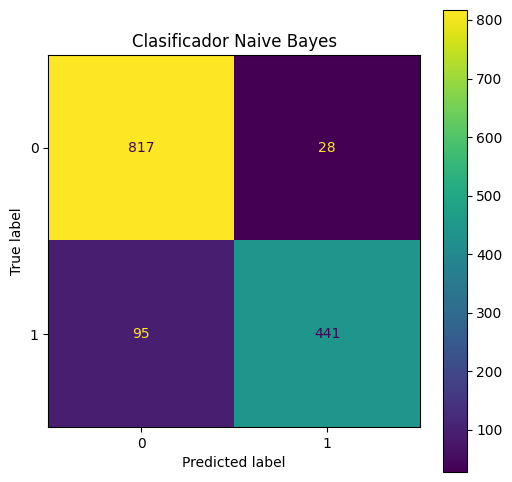

In [63]:
y_pred_naive_bayes = clf_naive_bayes.predict(X_test_minmax_scaled)
conf_matrix_bayes = confusion_matrix(y_test, y_pred_naive_bayes)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_bayes)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador Naive Bayes")

Regresión logistica:

Text(0.5, 1.0, 'Clasificador Regresión Logistica')

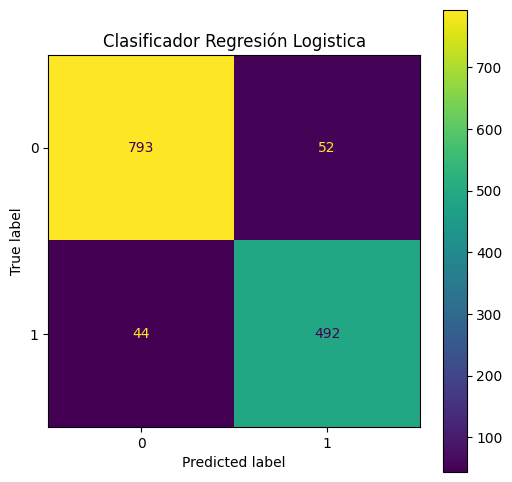

In [64]:
y_pred_log_reg = clf_log_reg.predict(X_test_std_scaled)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_log_reg)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador Regresión Logistica")

*El modelo de Regresión Logística tiene una mejor exactitud, pero es menos preciso. A la vez este modelo es más sensible que Naive Bayes.
En este caso es más importante la precision (Error Tipo 1). O sea, no quiero que el modelo me clasifique algo como SPAM y no es, ya que en este caso no llegaría el correo y lo pierdo. Es mejor que en ese caso lo clasifique como NO SPAM y no perder el correo. Por lo tanto, el modelo más preciso (Naive Bayes) es mejor en este sentido*

### Ejercicio 6:

> 6. Calcule la precisión y la recuperación de ambos modelos. Para cada métrica, ¿cuál es el mejor modelo? ¿Cómo se relacionan estas métricas con los tipos de errores analizados en el punto anterior? Expanda su respuesta.

In [65]:
tn_bayes, fp_bayes, fn_bayes, tp_bayes = conf_matrix_bayes.ravel()
tn_log_reg, fp_log_reg, fn_log_reg, tp_log_reg = conf_matrix_log_reg.ravel()
df_algoritms = pd.DataFrame(columns=["Algorithm", "Acurracy", "Precision", "Recall", "Specificity", "F1 Score"])

# Naive Bayes
row = {
    "Algorithm": "Clasificador Naive Bayes",
    "Acurracy": round(accuracy_score(y_test, y_pred_naive_bayes), 3),
    "Precision": round(precision_score(y_test, y_pred_naive_bayes), 3),
    "Recall": round(recall_score(y_test, y_pred_naive_bayes), 3),
    "Specificity": round(tn_bayes / (tn_bayes + fp_bayes), 3),
    "F1 Score": round(f1_score(y_test, y_pred_naive_bayes), 3)
}
df_algoritms.loc[len(df_algoritms)] = row

# Regresión Logistica
row = {
    "Algorithm": "Logistic regresion",
    "Acurracy": round(accuracy_score(y_test, y_pred_log_reg), 3),
    "Precision": round(precision_score(y_test, y_pred_log_reg), 3),
    "Recall": round(recall_score(y_test, y_pred_log_reg), 3),
    "Specificity": round(tn_log_reg / (tn_log_reg + fp_log_reg), 3),
    "F1 Score": round(f1_score(y_test, y_pred_log_reg), 3)
}
df_algoritms.loc[len(df_algoritms)] = row
df_algoritms

,Algorithm,Acurracy,Precision,Recall,Specificity,F1 Score
0,Clasificador Naive Bayes,0.911,0.940,0.823,0.967,0.878
1,Logistic regresion,0.930,0.904,0.918,0.938,0.911


*Ampliando la respuesta anterior, si bien tiene una mejor exactitud el modelo de Regresión Logistica, en este caso no es tanto lo que buscaría. Tampoco me enfocaría en la sensibilidad ya que no habría problemas (más allá de una mala experiencia para el usuario) si pasa algún mail. En este caso vemos que Naive Bayes es peor, sin embargo, sería el modelo a seleccionar en base a la información actual. Otro punto a destacar es la poca realidad del escenario, ya que las clases está prácticamente balanceadas, lo cual no creo que se de en la vida real. O sea, casi la misma cantidad de correos SPAM que correos NO SPAM. Puede ser, pero parecería improbable.*

**Relacion entre metricas:**
- Exactitud (Accuracy): $\frac{VP+VN}{Total}$ $\rightarrow$ Cuantas veces el modelo es correcto?
- Sensibilidad (Recall o Sensibility): $\frac{VP}{VP+FN}$ $\rightarrow$ Puede el modelo encontrar todas las instancias de la clase positiva?
- Precisión (Precision): $\frac{VP}{VP+FP}$ $\rightarrow$ Cuantas veces las predicciones positivas son correctas?
- Especificidad (Specificity): $\frac{VN}{VN+FP}$ $\rightarrow$ Puede el modelo encontrar todas las instancias de la clase negativa?

### Ejercicio 7:

> 7. Obtenga la curva ROC y el AUC (Área Bajo la Curva ROC) de ambos modelos.

*Curva ROC:*

In [66]:
print("Naive Byaes Clases:", clf_naive_bayes.classes_)
print("Logistic Regresion Clases:", clf_log_reg.classes_)

Naive Byaes Clases: [0 1]
Logistic Regresion Clases: [0 1]


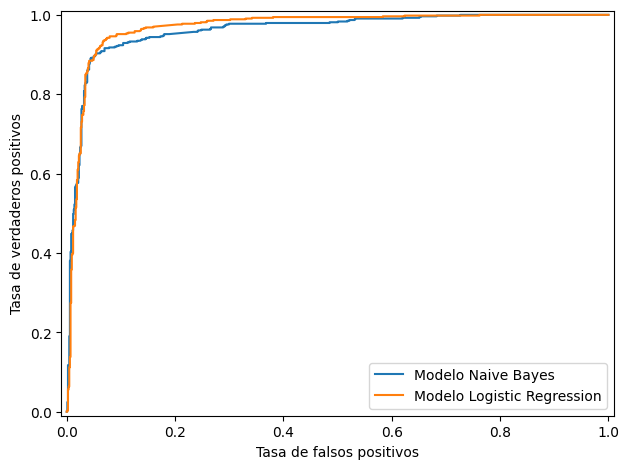

In [67]:
prob_naive = clf_naive_bayes.predict_proba(X_test_minmax_scaled)[:, -1]
prob_log_reg = clf_log_reg.predict_proba(X_test_std_scaled)[:, -1]

fpr_naive_bayes, tpr_naive_bayes, _ = roc_curve(y_test, prob_naive)
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, prob_log_reg)

plt.plot(fpr_naive_bayes, tpr_naive_bayes, label="Modelo Naive Bayes")
plt.plot(fpr_log_reg, tpr_log_reg, label="Modelo Logistic Regression")
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.legend()
plt.tight_layout()

*Área bajo la curva:*

In [68]:
print(f"Modelo Naive Bayes: {auc(fpr_naive_bayes, tpr_naive_bayes)}")
print(f"Modelo Logistic Regression: {auc(fpr_log_reg, tpr_log_reg)}")

Modelo Naive Bayes: 0.9611575995760839
Modelo Logistic Regression: 0.9690596573346286


*NOTA: Ambos modelos tienen la misma área bajo la curva y su curva ROC similar. Partiendo de la base de que se prefiere una mejor precisión en estos casos, el modelo a seguir estudiando sería el de Naive Bayes.*